# The purpose of this work , is to train the data set to find the portion of customer succeptible to left the bank or to stay



In [16]:
#### import neccessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [17]:
#load data to a panda data frame

df = pd.read_csv('train_churn.csv')

In [18]:
### check data head
df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1,0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1,0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1,0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1,0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1,1,170843.07,0


In [19]:
### shape of our data
df.shape

(165034, 14)

In [20]:
# return an array of column names

df.columns.values 

array(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  int64  
 11  IsActiveMember   165034 non-null  int64  
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 17.6+ MB


In [23]:
## describe all data types, not limiting to numeric (floats) columns

df.describe(include=object)

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


In [24]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [25]:
#### FIND ANY MISSING VALUES
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
#### count active value

df['IsActiveMember'].value_counts()

IsActiveMember
0    82885
1    82149
Name: count, dtype: int64

In [27]:
### count Exited Member

df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

# EDA: DATA VISUALIZATION

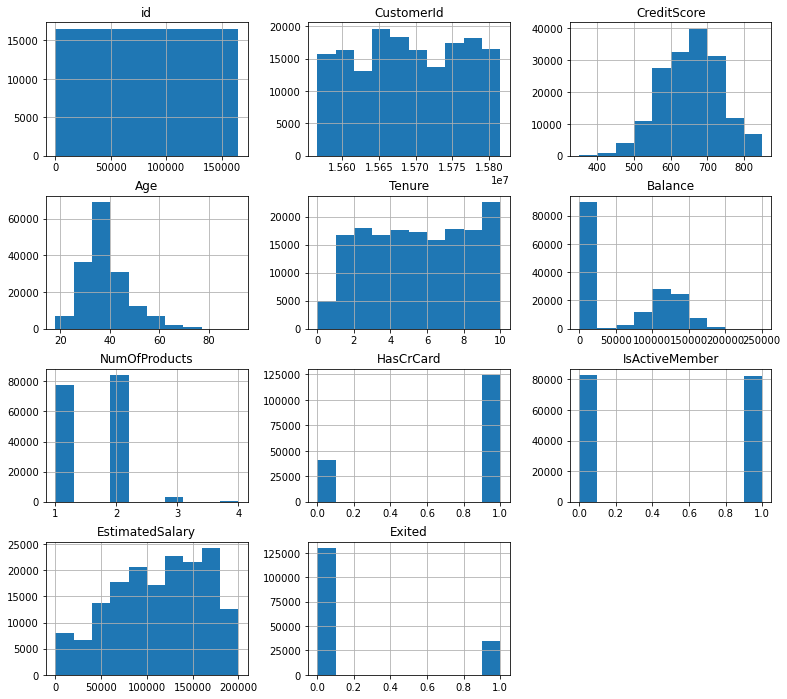

In [28]:
# Histograms viz for different features
df.hist(bins=10, figsize=(13, 12))
plt.show()

Text(0.5, 1.0, 'Exited status')

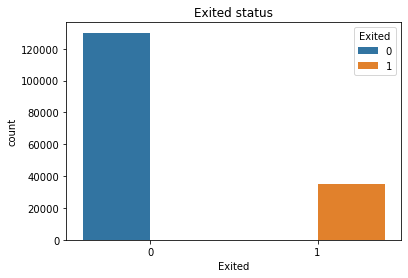

In [29]:
#### lets do some vizualisation
#### check to see Exited menber distribution


sns.countplot(x='Exited',hue='Exited', data=df)

plt.title('Exited status')

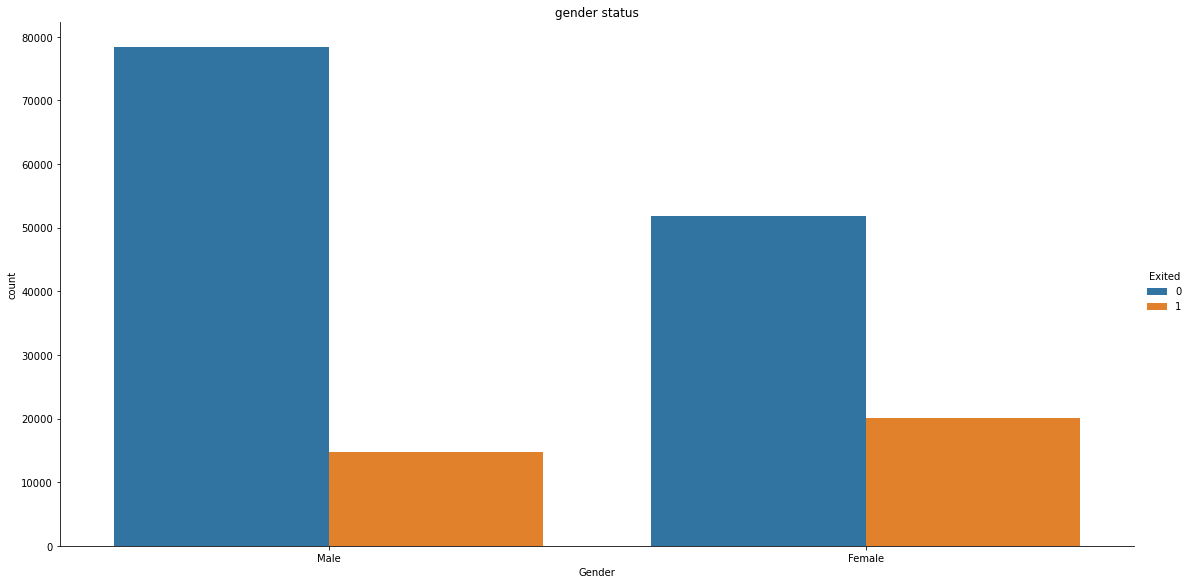

In [14]:
# Plotting the bar chart to see the churn by gender

# Create a catplot with gender' on the x-axis, 'Value' as hue, and kind='count'
sns.catplot(x='Gender', hue='Exited', kind='count', data=df, height=8, aspect=2)
plt.title('gender status')
# Show the plot
plt.show()

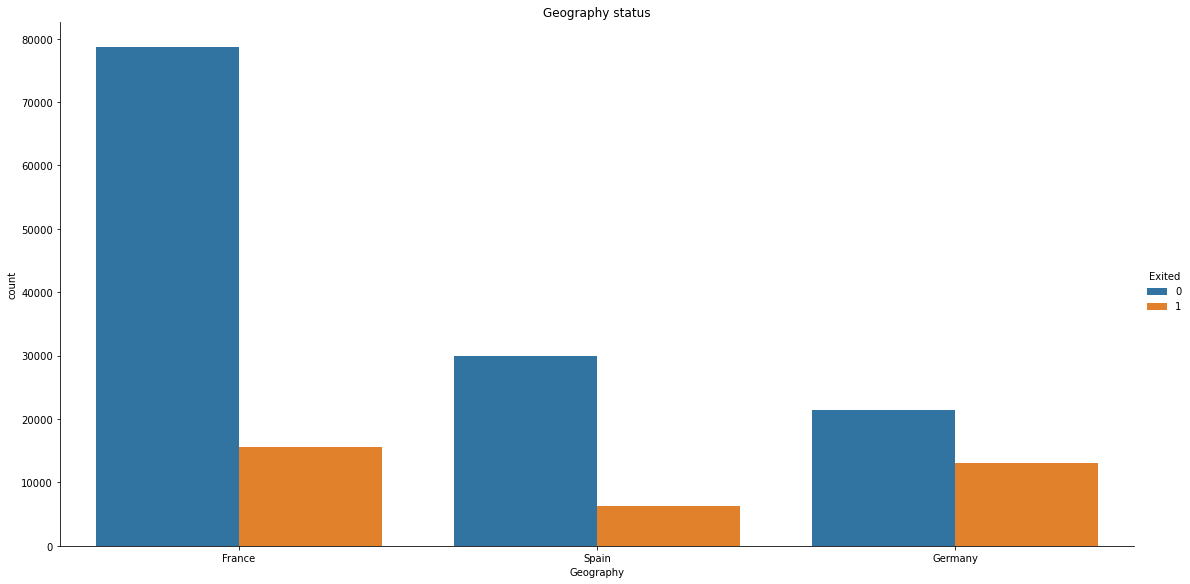

In [15]:
# Plotting the bar chart to see the churn geograohically

# Create a catplot with 'geography' on the x-axis, 'Value' as hue, and kind='count'
sns.catplot(x='Geography', hue='Exited', kind='count', data=df, height=8, aspect=2)
plt.title('Geography status')
# Show the plot
plt.show()

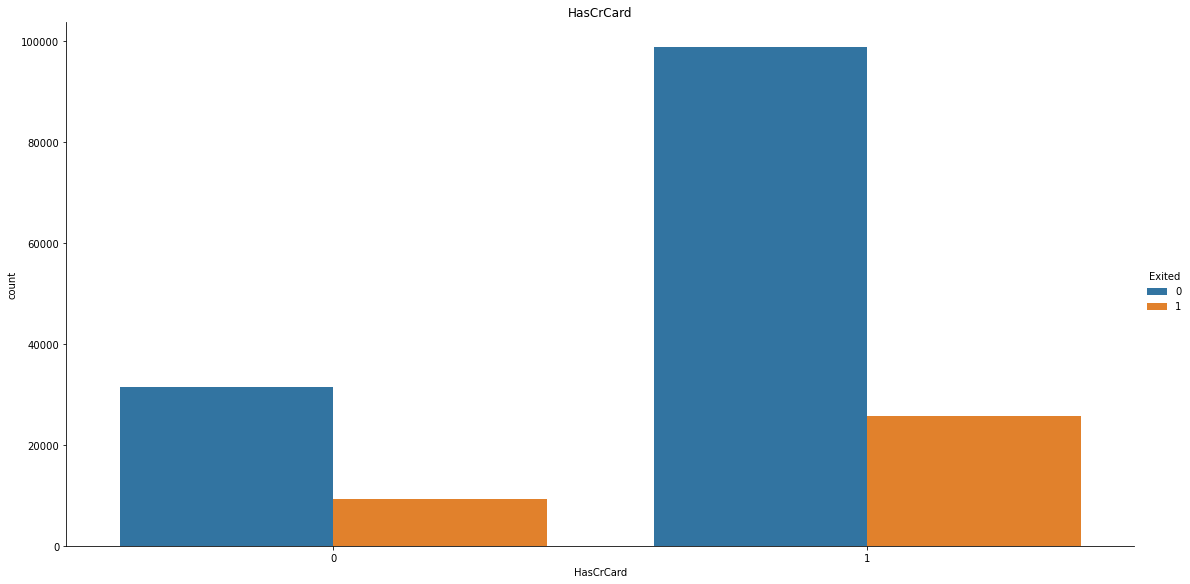

In [16]:
# Create a catplot with 'having credit card  on the x-axis, 'Value' as hue, and kind='count'
sns.catplot(x='HasCrCard', hue='Exited', kind='count', data=df, height=8, aspect=2)
plt.title('HasCrCard')
# Show the plot
plt.show()

In [110]:
# Calculating the mean credit score for each region
mean_Credit_Score  = df.groupby('Geography')['CreditScore'].mean()

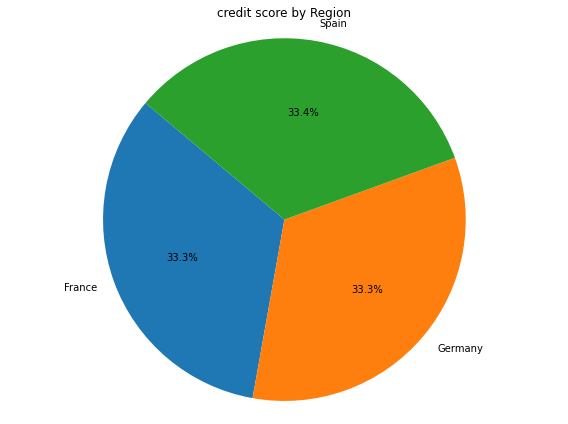

In [111]:
# Plotting the pie chart to see credit score average by region
plt.figure(figsize=(8, 6))
plt.pie(mean_Credit_Score, labels=mean_Credit_Score.index, autopct='%1.1f%%', startangle=140)
plt.title('credit score by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [30]:
####### lest drop the columns that with no has a strong impact on our study.
# List of columns to be removed
columns_to_remove = ['id', 'Surname','CustomerId','Geography']

# Remove columns
df = df.drop(columns=columns_to_remove)

print(df)

        CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    Male  33.0       3       0.00              2   
1               627    Male  33.0       1       0.00              2   
2               678    Male  40.0      10       0.00              2   
3               581    Male  34.0       2  148882.54              1   
4               716    Male  33.0       5       0.00              2   
...             ...     ...   ...     ...        ...            ...   
165029          667  Female  33.0       2       0.00              1   
165030          792    Male  35.0       3       0.00              1   
165031          565    Male  31.0       5       0.00              1   
165032          554  Female  30.0       7  161533.00              1   
165033          850    Male  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0               1               0        181449.97       0  
1               1        

In [31]:
# One-hot encode the 'Gender' column
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [32]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('Exited', axis=1)  # Adjust 'target_column_name' to the name of your target column
y = df_encoded['Exited']


In [33]:
# test and train model: We divide our data in to 2 set , using 33 percent for test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)


print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (110572, 9)
y_train shape:  (110572,)
X_test shape:  (54462, 9)
y_test shape:  (54462,)


In [34]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Initialize the logistic regression model
LR = LogisticRegression()

# Train the model
LR.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = LR.predict(X_test_scaled)

# Evaluate the model
LR_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8248319929492123


In [53]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[41020  1985]
 [ 7555  3902]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90     43005
           1       0.66      0.34      0.45     11457

    accuracy                           0.82     54462
   macro avg       0.75      0.65      0.67     54462
weighted avg       0.81      0.82      0.80     54462



In [54]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print("Logistic Regression MSE:", lr_mse)
print("Logistic Regression RMSE:", lr_rmse)

Logistic Regression MSE: 0.1751680070507877
Logistic Regression RMSE: 0.4185307719281674


In [59]:
# Initialize the Gaussian Naive Bayes model
GB = GaussianNB()

# Train the model
GB.fit(X_train_scaled, y_train)

# Predictions on the test set
pred = GB.predict(X_test_scaled)

# Evaluate the model
GB_accuracy = accuracy_score(y_test,pred)
print("Accuracy:", GB_accuracy)

Accuracy: 0.8250523300649995


In [60]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[40563  2442]
 [ 7086  4371]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     43005
           1       0.64      0.38      0.48     11457

    accuracy                           0.83     54462
   macro avg       0.75      0.66      0.69     54462
weighted avg       0.81      0.83      0.81     54462



In [63]:
GB_mse = mean_squared_error(y_test, pred)
GB_rmse = np.sqrt(GB_mse)
print("Gaussian Regression MSE:", GB_mse)
print("Gaussian Regression RMSE:", GB_rmse)

Gaussian Regression MSE: 0.17494766993500055
Gaussian Regression RMSE: 0.4182674621997276


In [46]:
# Initialize the DecisionTreeClassifier model
DTC = DecisionTreeClassifier(random_state=42)

# Train the model
DTC.fit(X_train_scaled, y_train)

# Predictions on the test set
DTC_pred = DTC.predict(X_test_scaled)

# Evaluate the model
DTC_accuracy = accuracy_score(y_test, DTC_pred)
print("Accuracy:", DTC_accuracy)

Accuracy: 0.7879989717601263


In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, DTC_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, DTC_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[36980  6025]
 [ 5521  5936]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     43005
           1       0.50      0.52      0.51     11457

    accuracy                           0.79     54462
   macro avg       0.68      0.69      0.69     54462
weighted avg       0.79      0.79      0.79     54462



In [48]:
# Initialize the  RandomForestClassifier model
RFC =  RandomForestClassifier(random_state=42)

# Train the model
RFC.fit(X_train_scaled, y_train)

# Predictions on the test set
RFC_pred = RFC.predict(X_test_scaled)

# Evaluate the model
RFC_accuracy = accuracy_score(y_test, RFC_pred)
print("Accuracy:", RFC_accuracy)

Accuracy: 0.8509052183173589


In [49]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, RFC_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, RFC_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[40518  2487]
 [ 5633  5824]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     43005
           1       0.70      0.51      0.59     11457

    accuracy                           0.85     54462
   macro avg       0.79      0.73      0.75     54462
weighted avg       0.84      0.85      0.84     54462



In [50]:
#####Train with MLPClassifier(Multi-layer Perceptron Classifier)

MLP = MLPClassifier(random_state=42)

# Train the model
MLP.fit(X_train_scaled, y_train)

# Predictions on the test set
MLP_pred = MLP.predict(X_test_scaled)

# Evaluate the model
MLP_accuracy = accuracy_score(y_test, MLP_pred)
print("Accuracy:", MLP_accuracy)

Accuracy: 0.8575704160699203


In [51]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, MLP_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, MLP_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[40841  2164]
 [ 5593  5864]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     43005
           1       0.73      0.51      0.60     11457

    accuracy                           0.86     54462
   macro avg       0.80      0.73      0.76     54462
weighted avg       0.85      0.86      0.85     54462



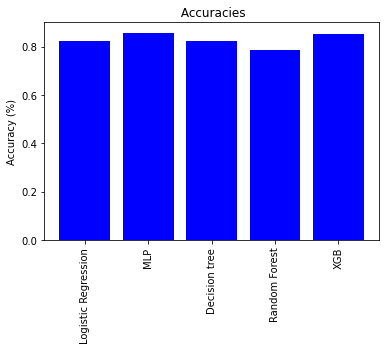

In [65]:
predictors_group = ('Logistic Regression','MLP','Decision tree','Random Forest','XGB')
x_pos = np.arange(len(predictors_group))
accuracies = [LR_accuracy,MLP_accuracy,GB_accuracy,DTC_accuracy,RFC_accuracy]
    
plt.bar(x_pos, accuracies, align='center', color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)',)
plt.title(' Accuracies')
plt.show()

To summarise, in this notebook, we have learned the root cause of churn in our nank from from different visualization.
We also seen the benefits of performing feature encoding  the Pandas library.

Finally, we compared the accuracy of five machine algorithm, to predicting the customer EXIT . We concluded that XGBoost Classifier  is slighly more accurate than 4 others.due to thebetter accuracy score.